In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install pandas-datareader

     |████████████████████████████████| 112kB 190kB/s eta 0:00:01


## 微軟(MSFT)股票分析

In [3]:
import pandas_datareader.data as web

In [4]:
MSFT=web.DataReader("MSFT","yahoo",start="2015-1-1",end="2019-12-12")

### 前五筆微軟股票資訊，查看包含哪些數據

In [5]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,41.700874,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.979183,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,41.593143,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.982681,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,41.503380,29114100


## 微軟股價走勢

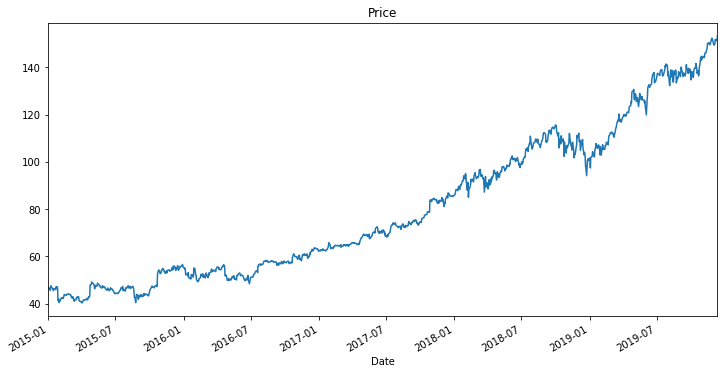

In [12]:
MSFT.Close.plot(figsize = (12,6), title="Price")

### 整體而言，微軟因為個人運算轉型至雲端運算，五年內股價上漲將近3倍，但仍有三個造成股價下跌較明顯的時間：

1. 2015年1月發布令人失望的財報後，股價開始下跌
2. 2016年6月13日，微軟收購LinkedIn，造成微軟股價下跌
3. 2018年末，受到美股重挫的影響，整體來說就是投資人開始擔心經濟前景轉差，企業獲利成長動能減弱，再加上FED宣佈升息，影響股市資金流到債市，隨後呈現利率倒掛現象，更令投資人感到害怕，因為歷史經驗顯示：經濟衰退將至，因此導致2018年末股價下跌

## 微軟單日交易量趨勢

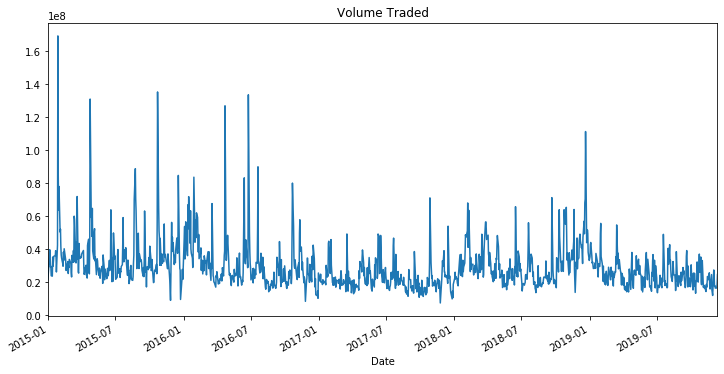

In [10]:
MSFT["Volume"].plot(figsize = (12,6), title = 'Volume Traded')

### 整體而言，微軟的交易量相當穩定，但在2015至2016年間交易量有幾次大幅波動的情形，以下六點是我認為可能造成交易量波動的因素：

1. 2015年1月，微軟發布財報
2. 2015年中，微軟發布新版Windows 10
3. 2015年9月23日，微軟在全球同步上市新版Office 2016
4. 2016年6月13日，微軟收購商業社交平台領英(LinkedIn)
4. 微軟在2018年6月4日宣布收購編碼平台 GitHub，微軟表示會重視開發者的力量，並將其與微軟產品整合
5. 2018年12月，FED宣布升息造成美股資金流到債市

## 報酬率
計算公式如下：

            
$$ r_t = \frac {P_t-P_(t-1_)}{P_(t-1_)} $$

In [14]:
P=MSFT['Adj Close']

In [15]:
r=P.diff()/P

### 最近100天的報酬率

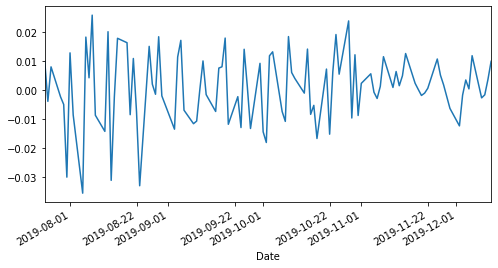

In [21]:
r[-100:].plot(figsize = (8,4))

## 技術分析-移動平均線(MA)
1. 每日收盤價
2. 20天的移動平均
3. 60天的移動平均

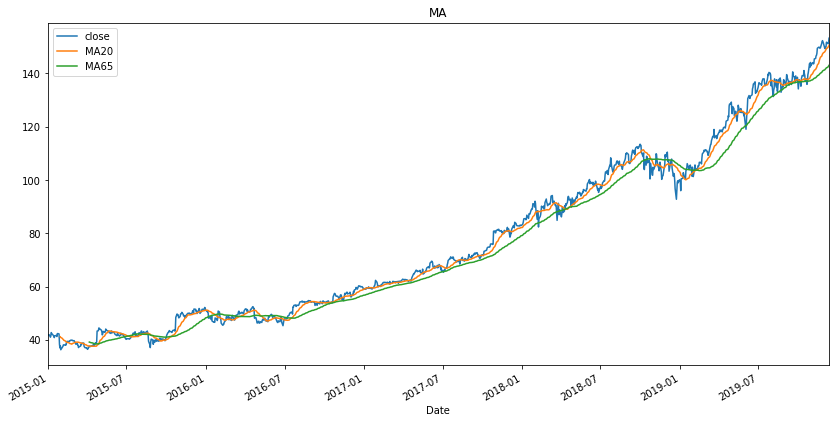

In [25]:
P.plot(label="close",figsize = (14,7),title = "MA")
P.rolling(window=20).mean().plot(label="MA20")
P.rolling(window=65).mean().plot(label="MA65")
plt.legend()

### 加入蘋果(AAPL)、亞馬遜(AMZN)、臉書(FB)、谷歌(GOOG)作美國五大科技巨擘比較

In [27]:
AAPL=web.DataReader("AAPL","yahoo",start="2015-1-1",end="2019-12-12")
AMZN=web.DataReader("AMZN","yahoo",start="2015-1-1",end="2019-12-12")
FB=web.DataReader("FB","yahoo",start="2015-1-1",end="2019-12-12")
GOOG=web.DataReader("GOOG","yahoo",start="2015-1-1",end="2019-12-12")

## 五間公司股價分析

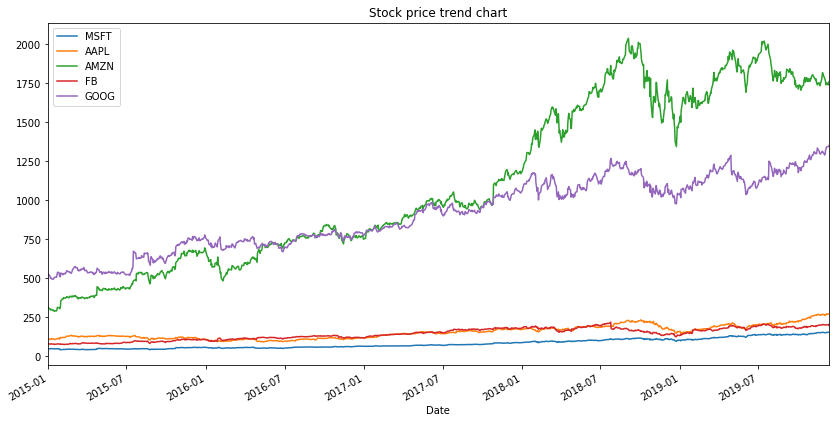

In [52]:
MSFT["Close"].plot(label="MSFT",figsize = (14,7),title="Stock price trend chart")      #畫出微軟股價
AAPL["Close"].plot(label="AAPL")     #畫出蘋果股價
AMZN["Close"].plot(label="AMZN")   #畫出亞馬遜股價
FB["Close"].plot(label="FB")        #畫出臉書股價
GOOG["Close"].plot(label="GOOG")   #畫出谷歌股價
plt.legend()

* 相較其他大公司，亞馬遜的股價波動最劇烈，也上升最多；微軟的股價有穩定上升的趨勢，但是全部公司中股價最低者。

* 從圖中可以看出在2019年初的時候每間公司的股價都有下跌的趨勢。

## 五間公司單日交易量分析

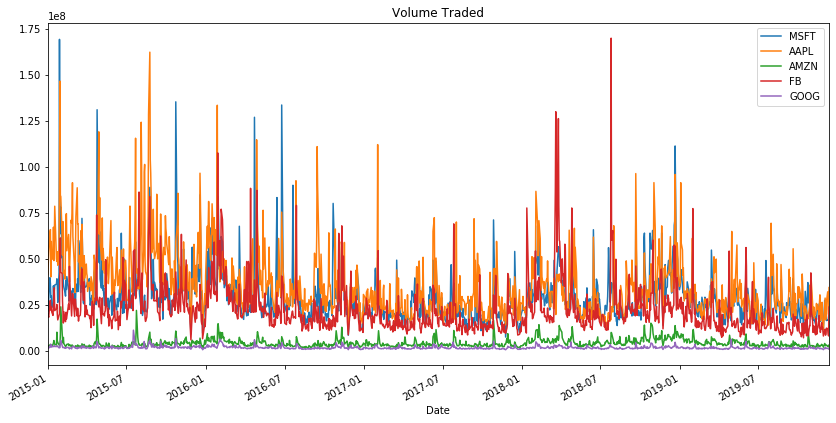

In [47]:
MSFT["Volume"].plot(label="MSFT",figsize = (14,7), title = 'Volume Traded')
AAPL["Volume"].plot(label="AAPL")
AMZN["Volume"].plot(label="AMZN")
FB["Volume"].plot(label="FB")
GOOG["Volume"].plot(label="GOOG")
plt.legend()

## 可以看出交易量爆衝的時間

### 1.FB交易量爆衝的時間

In [49]:
FB["Volume"].idxmax()

Timestamp('2018-07-26 00:00:00')

### 2.微軟交易量爆衝的時間

In [50]:
MSFT["Volume"].idxmax()

Timestamp('2015-01-27 00:00:00')

### 3.蘋果交易量爆衝的時間

In [51]:
AAPL["Volume"].idxmax()

Timestamp('2015-08-24 00:00:00')

### 亞馬遜跟谷歌在交易量方面較其他三間公司少，且波動幅度也較小

## 查看五間公司的相關性

In [56]:
import seaborn as sns

In [62]:
five_company_close=pd.concat([MSFT["Close"], AAPL["Close"], AMZN["Close"], FB["Close"], GOOG["Close"]], axis = 1)
five_company_close.columns = ["Microsoft Price","Apple Price","Amazon Price","FB Price", "Google Price"]
five_company_close

,Microsoft Price,Apple Price,Amazon Price,FB Price,Google Price
Date,,,,,
2014-12-31,46.450001,110.379997,310.350006,78.019997,524.958740
2015-01-02,46.759998,109.330002,308.519989,78.449997,523.373108
2015-01-05,46.330002,106.250000,302.190002,77.190002,512.463013
2015-01-06,45.650002,106.260002,295.290009,76.150002,500.585632
2015-01-07,46.230000,107.750000,298.420013,76.150002,499.727997
...,...,...,...,...,...
2019-12-06,151.750000,270.709991,1751.599976,201.050003,1340.619995
2019-12-09,151.360001,266.920013,1749.510010,201.339996,1343.560059
2019-12-10,151.130005,268.480011,1739.209961,200.869995,1344.660034


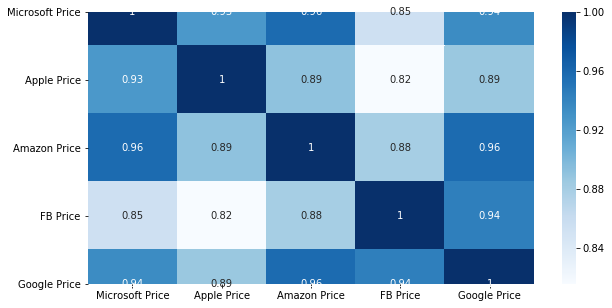

In [63]:
cor=five_company_close.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,cmap='Blues',annot=True)

### 從五間公司股價的相關性，可以看出來每間公司在股價變動方面都很有相關，其中以Amazon跟Google的相關性最大，因此畫出兩間公司的股價趨勢圖查看是否符合。

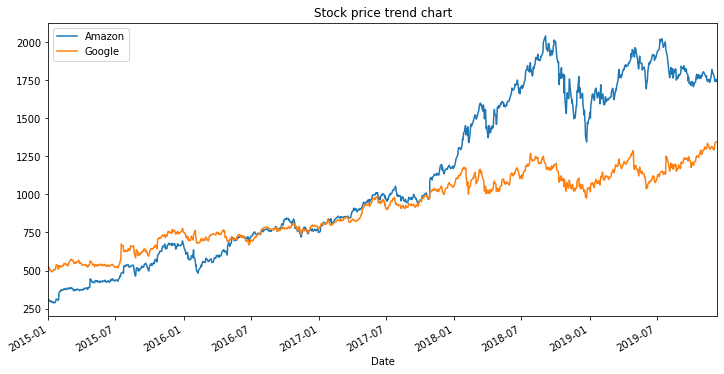

In [67]:
AMZN["Close"].plot(label="Amazon",figsize = (12,6), title="Stock price trend chart")   #畫出亞馬遜股價
GOOG["Close"].plot(label="Google")   #畫出谷歌股價
plt.legend()

確實大多數Google股價上升時，Amazon股價也上升，但無法判斷兩者的因果關係。

## 計算並繪製五間公司的報酬率
計算公式如下：

            
$$ r_t = \frac {P_t-P_(t-1_)}{P_(t-1_)} $$

In [69]:
P=MSFT["Close"]
P1=AAPL["Close"]
P2=AMZN["Close"]
P3=FB["Close"]
P4=GOOG["Close"]

In [71]:
r=P.diff()/P
r1=P1.diff()/P1
r2=P2.diff()/P2
r3=P3.diff()/P3
r4=P4.diff()/P4

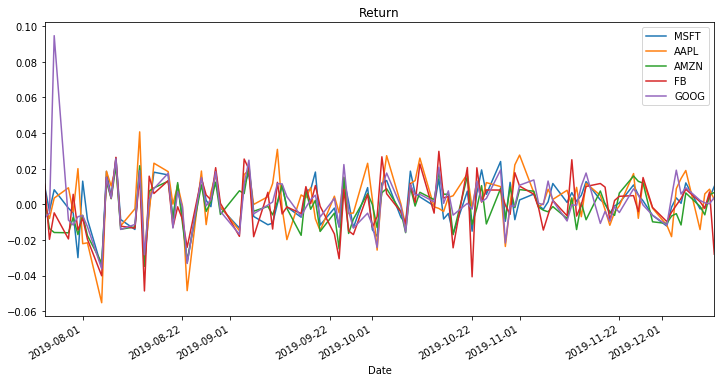

In [86]:
r[-100:].plot(label="MSFT",figsize = (12,6),title="Return")
r1[-100:].plot(label="AAPL")
r2[-100:].plot(label="AMZN")
r3[-100:].plot(label="FB")
r4[-100:].plot(label="GOOG")
plt.legend()

繪製成一張圖太醜了，故各別繪製。

### 微軟公司近一百日報酬率

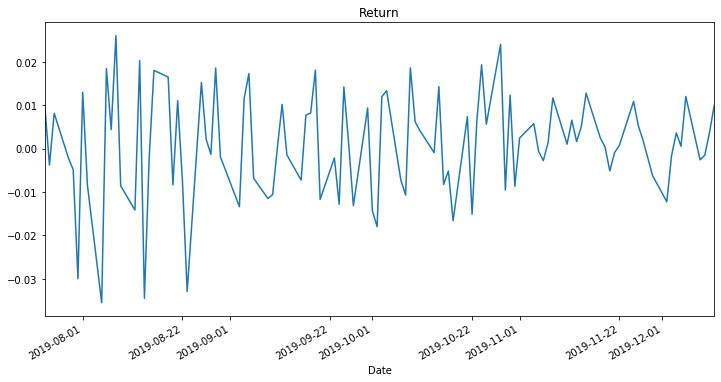

In [75]:
r[-100:].plot(label="MSFT",figsize = (12,6),title="Return")

### 蘋果公司近一百日報酬率

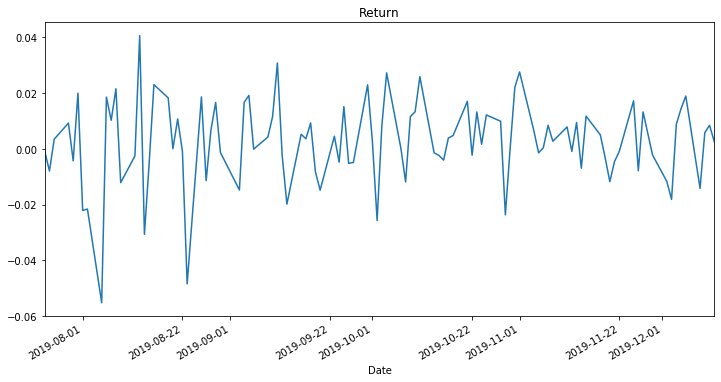

In [77]:
r1[-100:].plot(label="AAPL",figsize = (12,6),title="Return")

### 亞馬遜近一百日報酬率

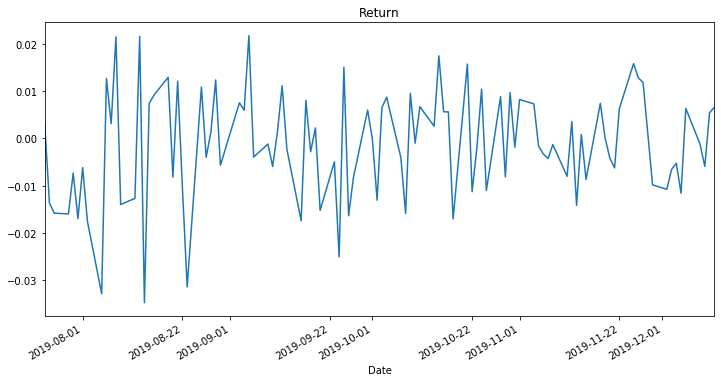

In [79]:
r2[-100:].plot(label="AMZN",figsize = (12,6),title="Return")

### 臉書近一百日報酬率

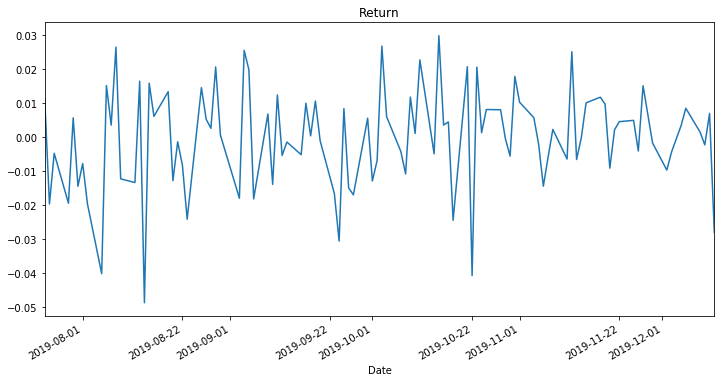

In [82]:
r3[-100:].plot(label="FB",figsize = (12,6),title="Return")

### 谷歌近一百日報酬率

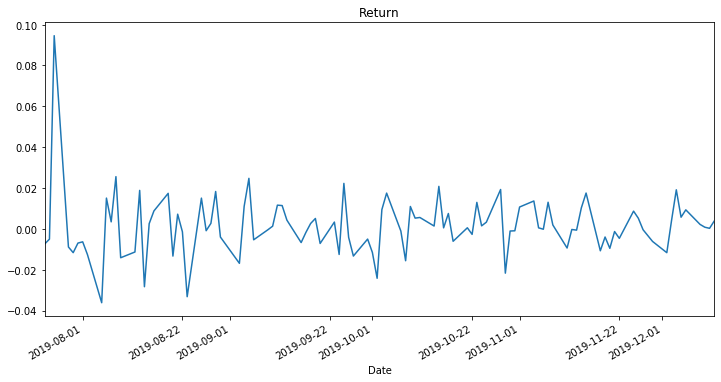

In [81]:
r4[-100:].plot(label="GOOG",figsize = (12,6),title="Return")

### 加入報酬率到pandas 表格中

In [89]:
MSFT["Return"]=r
AAPL["Return"]=r1
AMZN["Return"]=r2
FB["Return"]=r3
GOOG["Return"]=r4

## 計算累積每日報酬率

In [91]:
MSFT["Cumulative Return"] = ( 1 + MSFT["Return"] ).cumprod()
AAPL["Cumulative Return"] = ( 1 + AAPL["Return"] ).cumprod()
AMZN["Cumulative Return"] = ( 1 + AMZN["Return"] ).cumprod()
FB["Cumulative Return"] = ( 1 + FB["Return"] ).cumprod()
GOOG["Cumulative Return"] = ( 1 + GOOG["Return"] ).cumprod()

In [93]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close,Return,Cumulative Return
Date,,,,,,,,
2014-12-31,47.439999,46.450001,46.730000,46.450001,21552500.0,41.700874,NaN,NaN
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.979183,0.006630,1.006630
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.593143,-0.009281,0.997287
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.982681,-0.014896,0.982431
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,41.503380,0.012546,0.994757


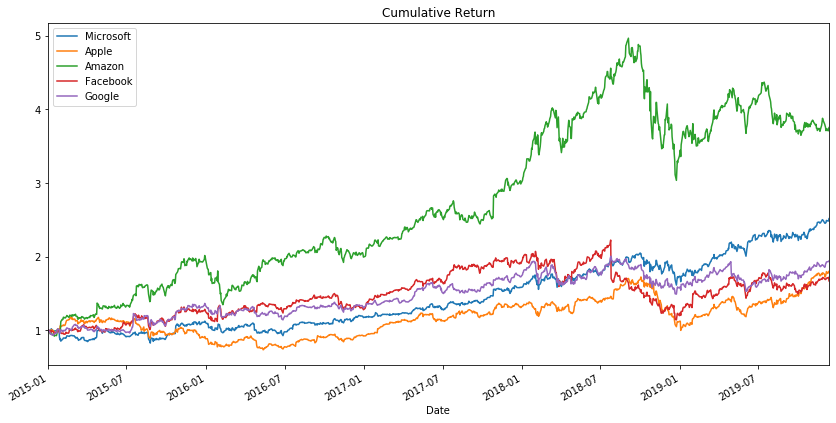

In [94]:
MSFT["Cumulative Return"].plot(label="Microsoft",figsize=(14,7),title="Cumulative Return")
AAPL["Cumulative Return"].plot(label="Apple")
AMZN["Cumulative Return"].plot(label="Amazon")
FB["Cumulative Return"].plot(label="Facebook")
GOOG["Cumulative Return"].plot(label="Google")
plt.legend()

### 從趨勢圖可以看出亞馬遜的累積報酬率最高，如果有資金的人可以選擇亞馬遜投資。